# Funções agregadas para análise de dados
<p><img src = https://arquivo.devmedia.com.br/noticias/documentacao/documentacao_sql-funcoes-de-agregacao_38463.png width = 500> </p>

## Introdução
No módulo anterior, discutimos como usar SQL para preparar conjuntos de dados para análise. Uma vez que os dados estão preparados, o próximo passo é analisá-los. Geralmente, cientistas de dados e profissionais de análise tentarão entender os dados resumindo-os e tentando encontrar padrões de alto nível nos dados. O SQL pode ajudar nessa tarefa principalmente por meio do uso de funções agregadas: funções que recebem linhas como entrada e retornam um número para cada linha. Neste módulo, discutiremos como usar funções agregadas básicas e como derivar estatísticas e outras informações úteis de dados usando funções agregadas com **GROUP BY**. Em seguida, usaremos a cláusula **HAVING** para filtrar agregações e ver como limpar os dados e examinar a qualidade dos dados usando funções de agregação. Por fim, veremos como usar agregados para entender a qualidade dos dados

## Funções agregadas
Com dados, muitas vezes estamos interessados ​​em entender as propriedades de uma coluna ou tabela inteira em vez de apenas ver linhas individuais de dados. Como um exemplo simples, digamos que você esteja se perguntando quantos clientes o ZoomZoom tem. Você pode selecionar todos os dados da tabela e ver quantas linhas foram retiradas, mas seria incrivelmente tedioso fazer isso. Felizmente, existem funções fornecidas pelo SQL que podem ser usadas para fazer cálculos em grandes grupos de linhas. Essas funções são chamadas de funções agregadas. A função agregada recebe uma ou mais colunas com várias linhas e retorna um número com base nessas colunas. Como ilustração, podemos usar a função **COUNT** para contar quantas linhas existem na tabela de **clientes** para descobrir quantos clientes o ZoomZoom possui:

In [1]:
import pandas as pd
import psycopg2 as pg

# Realizando a conexão local no Banco de dados (SQLDA)
connection = pg.connect(user="postgres",
                                  password="admin",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="sqlda")
# Query a ser realizada

sql = """
      SELECT COUNT(customer_id)
      FROM customers;
      """
df = pd.read_sql_query(con=connection, sql=sql)
df

,count
0,50000


A função **COUNT** retornará o número de linhas sem um valor **NULL** na coluna. Como a coluna **customer_id** é uma chave primária e não pode ser **NULL**, a função **COUNT** retornará o número de linhas na tabela. Nesse caso, a consulta retornou 50.000.

Conforme mostrado aqui, a função **COUNT** funciona com uma única coluna e conta quantos valores não **NULL** ela possui. No entanto, se cada coluna tiver pelo menos um valor **NULL**, será impossível determinar quantas linhas existem. Para obter uma contagem do número de linhas nessa situação, você pode usar alternativamente a função **COUNT** com um asterisco, (*), para obter a contagem total de linhas:

In [2]:
sql = """
      SELECT COUNT(*)
      FROM customers;
      """
df = pd.read_sql_query(con=connection, sql=sql)
df

,count
0,50000


Essa consulta também retornará **50.000**.
Digamos, no entanto, que você estava interessado no número de estados exclusivos na lista de clientes. Esta resposta pode ser consultada usando **COUNT** (expressão **DISTINCT**):

In [3]:
sql = """
      SELECT COUNT(DISTINCT state)
      FROM customers;
      """
df = pd.read_sql_query(con=connection, sql=sql)
df

,count
0,51


A figura a seguir é um resumo das principais funções de agregação usadas no SQL:

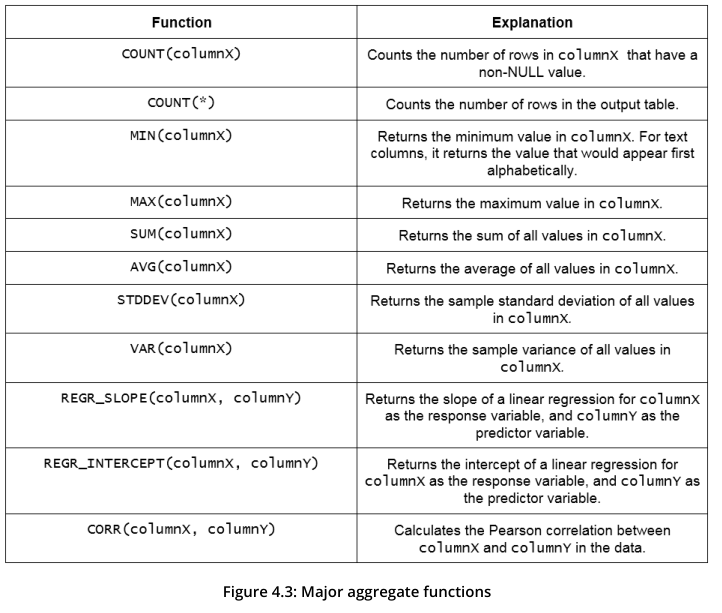

In [4]:
from IPython.display import Image
Image('images/aggregate_functions.PNG')

As funções agregadas também podem ser usadas com a cláusula **WHERE** para calcular valores agregados para subconjuntos de dados específicos. Por exemplo, se você quiser saber quantos clientes ZoomZoom tem na Califórnia, você pode usar a seguinte consulta:

In [5]:
sql = """
      SELECT COUNT(*)
      FROM customers
      WHERE state='CA';
      """
df = pd.read_sql_query(con=connection, sql=sql)
df

,count
0,5038


Você também pode fazer aritmética com funções agregadas. Na consulta a seguir, você pode dividir a contagem de linhas na tabela de clientes por dois, assim:

In [7]:
sql = """
      SELECT COUNT(*)/2
      FROM customers;
      """
df = pd.read_sql_query(con=connection, sql=sql)
df

,?column?
0,25000


Você também pode usar as funções agregadas entre si de maneiras matemáticas. Na consulta a seguir, em vez de usar a função AVG para calcular o MSRP médio de produtos no ZoomZoom, você pode "construir" a função AVG usando **SUM** e **COUNT** da seguinte forma:

In [8]:
sql = """
      SELECT SUM(base_msrp)::FLOAT/COUNT(*) AS avg_base_msrp
      FROM products
      """
df = pd.read_sql_query(con=connection, sql=sql)
df

,avg_base_msrp
0,35020.8275


> ##### Observação
> A razão pela qual temos que converter a soma é que o PostgreSQL trata a divisão inteira de forma diferente da divisão *float*. Por exemplo, dividir 7 por 2 como inteiros no PostgreSQL lhe dará 3. Para obter uma resposta mais precisa de 3.5, você tem que converter um dos números para *float*.